In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [419]:
df = pd.read_csv('data/output/acs_medicaid.txt', delimiter='\t', header=None)

# convert the first row to the header
df.columns = df.iloc[0]
df = df[1:]

# make the index start from 0
df.index = range(len(df))

df['share_unins'] = df['uninsured'].astype(float) / df['adult_pop'].astype(float)
df['direct_share'] = df['ins_direct'].astype(float) / df['adult_pop'].astype(float)
df['medi_share'] = df['ins_medicaid'].astype(float) / df['adult_pop'].astype(float)
df['unins_share'] = df['uninsured'].astype(float) / df['adult_pop'].astype(float)
df['expand_year'] = df['expand_year'].astype(float) 


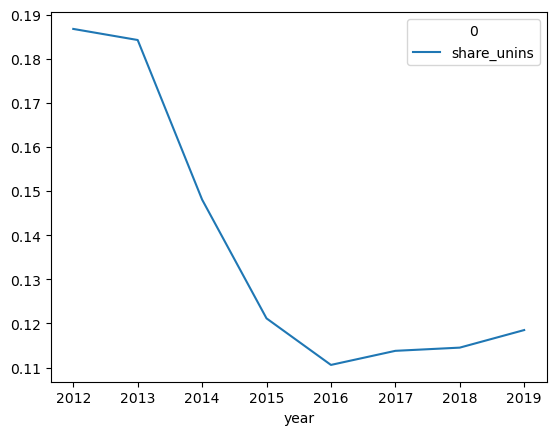

In [420]:
df.groupby('year').agg({'share_unins': 'mean'}).plot()
plt.show()

# Plot the share of the adult population with direct purchase health insurance over time.



In [342]:
df.head(3)

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,NaN,FALSE,0.199191,0.061295,0.064791,0.199191
1,Alaska,2012,460946,222769,15608,2027,28177,118818,TRUE,2015-09-01,2015.0,FALSE,0.257770,0.033861,0.061129,0.257770
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014.0,FALSE,0.234133,0.068036,0.110940,0.234133


In [421]:
df['direct_share'] = df['ins_direct'].astype(float) / df['adult_pop'].astype(float)

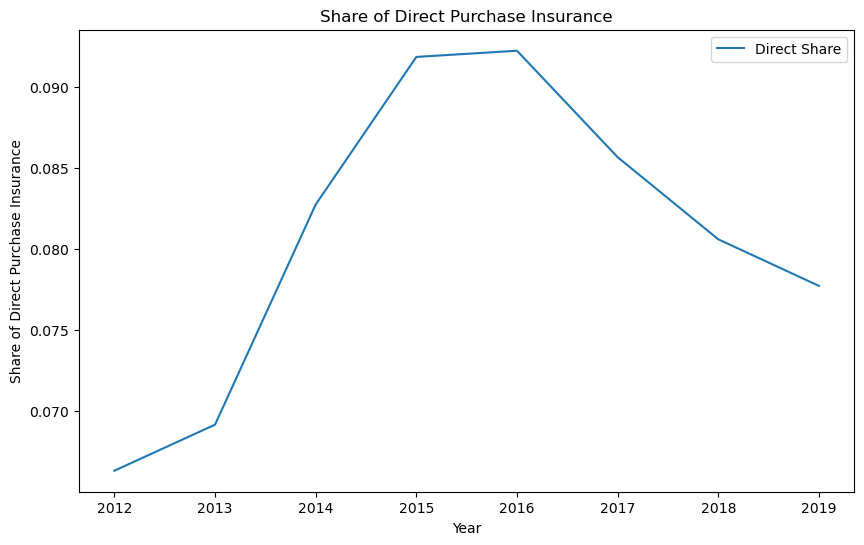

In [422]:
direct_share = df.groupby('year').agg({'direct_share': 'mean'}).reset_index()

# set the size of the figure
plt.figure(figsize=(10, 6))

# plot the data
plt.plot(direct_share['year'], direct_share['direct_share'], label='Direct Share')

plt.title('Share of Direct Purchase Insurance')
plt.xlabel('Year')
plt.ylabel('Share of Direct Purchase Insurance')
plt.legend()
q1 = plt.gcf()
plt.show()


# Discuss the reduction in direct purchase health insurance in later years. Can you list a couple of policies that might have affected the success of the direct purchase insurance market?

The share of direct purchase kept increasing until around 2016, after when the share of direct purchase starts decreasing. The most likely reason for this decrease is the medicaid expansion after 2014. The medicaid expansion increased the number of people who are eligible for medicaid, which is a cheaper alternative to direct purchase insurance. The other reason might be the introduction of the health insurance marketplace, which provides a platform for people to compare and purchase health insurance plans. The policy of individual and employer mandate might have also affected the success of the direct purchase insurance market, which might increase the share of people who are covered by employer-sponsored insurance and direct purchase becomes less preferable.

# Plot the share of the adult population with Medicaid over time.



In [345]:
df.head(3)

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,NaN,FALSE,0.199191,0.061295,0.064791,0.199191
1,Alaska,2012,460946,222769,15608,2027,28177,118818,TRUE,2015-09-01,2015.0,FALSE,0.257770,0.033861,0.061129,0.257770
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014.0,FALSE,0.234133,0.068036,0.110940,0.234133


In [423]:
df['medi_share'] = df['ins_medicaid'].astype(float) / df['adult_pop'].astype(float)

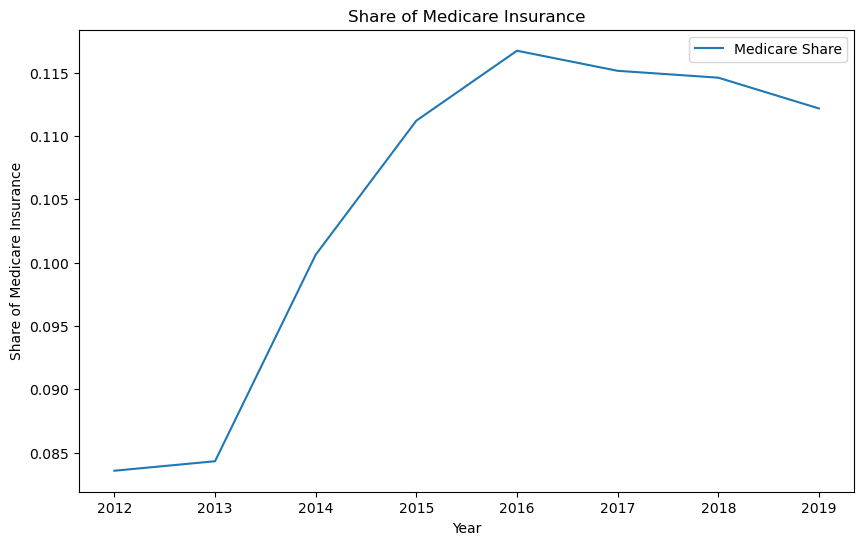

In [424]:
medi_share = df.groupby('year').agg({'medi_share': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(medi_share['year'], medi_share['medi_share'], label='Medicare Share')
plt.title('Share of Medicare Insurance')
plt.xlabel('Year')
plt.ylabel('Share of Medicare Insurance')
plt.legend()
q3 = plt.gcf()
plt.show()


# Plot the share of uninsured over time, separately by states that expanded Medicaid in 2014 versus those that did not. Drop all states that expanded after 2014.

In [170]:
df.head(3)

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,NaN,FALSE,0.199191,0.061295,0.064791
1,Alaska,2012,460946,222769,15608,2027,28177,118818,TRUE,2015-09-01,2015,FALSE,0.257770,0.033861,0.061129
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014,FALSE,0.234133,0.068036,0.110940


In [425]:
df['unins_share'] = df['uninsured'].astype(float) / df['adult_pop'].astype(float)

In [426]:
df['expand_year'] = df['expand_year'].astype(float) 
# replace the missing values with 0
# df['expand_year'] = df['expand_year'].fillna(0)

# drop if expand_ever is missing
df = df.dropna(subset=['expand_ever'])
df['expand_year'] = df['expand_year'].fillna(0)

df1 = df[df['expand_year']<=2014]

In [427]:
df1['expand_year'].value_counts()

2014.0    216
0.0       136
Name: expand_year, dtype: int64

In [180]:
df

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,0.0,FALSE,0.199191,0.061295,0.064791,0.199191
1,Alaska,2012,460946,222769,15608,2027,28177,118818,TRUE,2015-09-01,2015.0,FALSE,0.257770,0.033861,0.061129,0.257770
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014.0,FALSE,0.234133,0.068036,0.110940,0.234133
3,Arkansas,2012,1761365,871970,106277,39157,114012,432449,TRUE,2014-01-01,2014.0,FALSE,0.245519,0.060338,0.064729,0.245519
4,California,2012,23798381,12015639,1824564,180861,2275053,5901869,TRUE,2014-01-01,2014.0,FALSE,0.247995,0.076668,0.095597,0.247995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Arkansas,2019,1714037,882873,129982,41176,251470,224799,TRUE,2014-01-01,2014.0,TRUE,0.131152,0.075834,0.146712,0.131152
412,California,2019,23853893,13216474,2094480,200453,4055354,2611825,TRUE,2014-01-01,2014.0,TRUE,0.109493,0.087805,0.170008,0.109493
413,Colorado,2019,3503859,2118218,313232,28424,357413,375952,TRUE,2014-01-01,2014.0,TRUE,0.107297,0.089396,0.102006,0.107297
414,Delaware,2019,555236,335398,32433,6235,66802,51796,TRUE,2014-01-01,2014.0,TRUE,0.093286,0.058413,0.120313,0.093286


In [428]:
df_treat = df1[df1['expand_ever']=="TRUE"]
df_control = df1[df1['expand_ever']=="FALSE"]

In [429]:
df_treat

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014.0,FALSE,0.234133,0.068036,0.110940,0.234133
3,Arkansas,2012,1761365,871970,106277,39157,114012,432449,TRUE,2014-01-01,2014.0,FALSE,0.245519,0.060338,0.064729,0.245519
4,California,2012,23798381,12015639,1824564,180861,2275053,5901869,TRUE,2014-01-01,2014.0,FALSE,0.247995,0.076668,0.095597,0.247995
5,Colorado,2012,3270163,1801613,303179,27254,213045,639004,TRUE,2014-01-01,2014.0,FALSE,0.195404,0.092711,0.065148,0.195404
6,Delaware,2012,561217,334373,27507,7529,66440,71580,TRUE,2014-01-01,2014.0,FALSE,0.127544,0.049013,0.118386,0.127544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Arkansas,2019,1714037,882873,129982,41176,251470,224799,TRUE,2014-01-01,2014.0,TRUE,0.131152,0.075834,0.146712,0.131152
412,California,2019,23853893,13216474,2094480,200453,4055354,2611825,TRUE,2014-01-01,2014.0,TRUE,0.109493,0.087805,0.170008,0.109493
413,Colorado,2019,3503859,2118218,313232,28424,357413,375952,TRUE,2014-01-01,2014.0,TRUE,0.107297,0.089396,0.102006,0.107297
414,Delaware,2019,555236,335398,32433,6235,66802,51796,TRUE,2014-01-01,2014.0,TRUE,0.093286,0.058413,0.120313,0.093286


In [430]:
df_control

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,0.0,FALSE,0.199191,0.061295,0.064791,0.199191
9,Florida,2012,11578613,5365172,860060,148499,839467,3332786,FALSE,NaN,0.0,FALSE,0.287840,0.074280,0.072502,0.287840
10,Georgia,2012,6117277,3181157,345523,82211,332449,1561266,FALSE,NaN,0.0,FALSE,0.255222,0.056483,0.054346,0.255222
11,Idaho,2012,944959,475318,89013,10683,45484,217945,FALSE,NaN,0.0,FALSE,0.230640,0.094198,0.048133,0.230640
16,Kansas,2012,1729836,1045580,125214,16433,66156,305904,FALSE,NaN,0.0,FALSE,0.176840,0.072385,0.038244,0.176840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Georgia,2019,6265771,3561541,461382,87012,350219,1186256,FALSE,NaN,0.0,FALSE,0.189323,0.073635,0.055894,0.189323
394,Idaho,2019,1006189,568304,115931,10092,48815,166451,FALSE,NaN,0.0,FALSE,0.165427,0.115218,0.048515,0.165427
398,Kansas,2019,1652156,1048902,130909,16319,74379,216631,FALSE,NaN,0.0,FALSE,0.131120,0.079235,0.045019,0.131120
407,Florida,2019,12249102,6135284,1604542,189681,831306,2391683,FALSE,NaN,0.0,FALSE,0.195254,0.130993,0.067867,0.195254


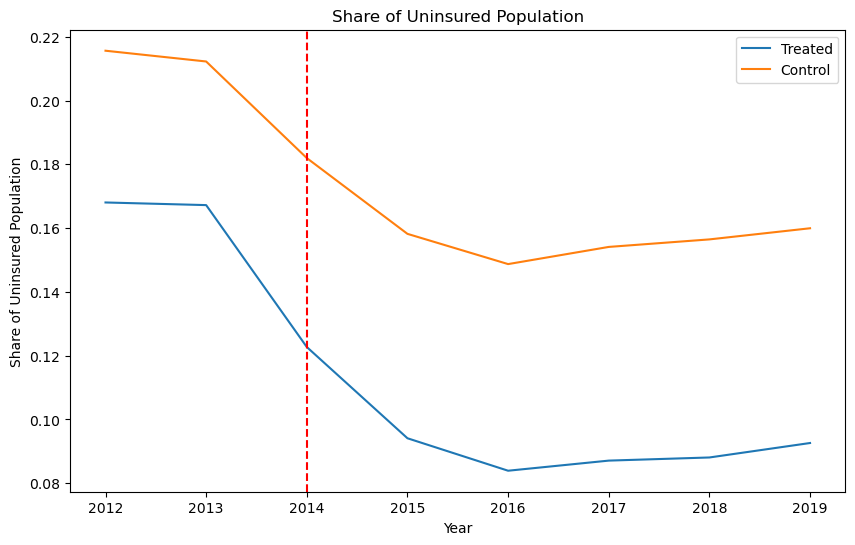

In [431]:
df_treat = df_treat.groupby('year').agg({'unins_share': 'mean'}).reset_index()
df_control = df_control.groupby('year').agg({'unins_share': 'mean'}).reset_index()


plt.figure(figsize=(10, 6))
plt.plot(df_treat['year'], df_treat['unins_share'], label='Treated')
plt.plot(df_control['year'], df_control['unins_share'], label='Control')
plt.title('Share of Uninsured Population')
plt.xlabel('Year')
plt.ylabel('Share of Uninsured Population')
# draw a vertical line at 2014
plt.axvline(x = '2014', color = 'red', linestyle='--')
plt.legend()
q4 = plt.gcf()
plt.show()

# Calculate the average percent of uninsured individuals in 2012 and 2015, separately for expansion and non-expansion states. Present your results in a basic 2x2 DD table.

In [432]:
expan_12 = df[(df['year'] == '2012') & (df['expand_year']!=0)]['share_unins'].mean()
expan_15 = df[(df['year'] == '2015')&(df['expand_year']!=0)]['share_unins'].mean()

unex_12 = df[(df['year'] == '2012') & (df['expand_year']==0)]['share_unins'].mean()
unex_15 = df[(df['year'] == '2015') & (df['expand_year']==0)]['share_unins'].mean()

In [433]:
expan_12, expan_15, unex_12, unex_15

(0.1748660120699515,
 0.1037688845110161,
 0.21565308556417337,
 0.15820754735535023)

In [435]:
# create a 2 by 2 contingency table
table = np.array([[expan_12, expan_15], [unex_12, unex_15]])

# give the row and column names
table = pd.DataFrame(table, columns = ['2012', '2015'], index = ['Expanded', 'Unexpanded'])
q5 = table

# Estimate the effect of Medicaid expansion on the uninsurance rate using a standard DD regression estimator, again focusing only on states that expanded in 2014 versus those that never expanded.

In [436]:
import statsmodels.formula.api as smf

In [437]:
df1 = df[df['expand_year']<=2014]
# drop if expand year is na
df1 = df1.dropna(subset=['expand_year'])
df1['TREAT'] = np.where(df1['expand_year']==0, 0, 1)

In [438]:
df1['expand_ever'].value_counts()

TRUE     216
FALSE    136
Name: expand_ever, dtype: int64

In [439]:
df1['year'] = df1['year'].astype(float)
df1['post'] = np.where(df1['year']>=2014, 1, 0)

In [440]:
df1['post'].value_counts()

1    264
0     88
Name: post, dtype: int64

In [441]:
model = smf.ols('share_unins ~ 1 + TREAT + post + TREAT*post', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            share_unins   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     119.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.80e-53
Time:                        11:09:55   Log-Likelihood:                 628.45
No. Observations:                 352   AIC:                            -1249.
Df Residuals:                     348   BIC:                            -1233.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2140      0.007     30.564      0.000       0.200       0.228
TREAT         -0.0463      0.009     -5.184      0.000      -0.064      -0.029
post          -0.0541      0.008     -6.687      0.000      -0.070      -0.038
TREAT:post    -0.0188      0.010     -1.826      0.069      -0.039       0.001
==============================================================================
Omnibus:                        5.959   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.716
Skew:                           0.294   Prob(JB):                       0.0574
Kurtosis:                       3.212   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
# summary_col
from statsmodels.iolib.summary2 import summary_col

info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model'],
                            info_dict=info_dict,
                            regressor_order=['TREAT', 'post', 'TREAT:post'])

q6 = results_table

In [449]:
# save q6 as tex file
with open('q6.tex', 'w') as tf:
    tf.write(q6.as_latex())

# Include state and year fixed effects in your estimates. Try using the lfe or fixest package to estimate this instead of directly including the fixed effects.

In [443]:
df1['D_T'] = df1['TREAT']*df1['post']

model = smf.ols('share_unins ~ D_T + C(year) + C(State)', data = df1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            share_unins   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          7.41e-169
Time:                        11:09:59   Log-Likelihood:                 1037.2
No. Observations:                 352   AIC:                            -1970.
Df Residuals:                     300   BIC:                            -1770.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2068      0.005     37.741      0.000       0.196       0.218
C(year)[T.2013.0]                   -0.0018      0.003     -0.617      0.538      -0.008       0.004
C(year)[T.2014.0]                   -0.0293      0.004     -8.066      0.000      -0.036      -0.022
C(year)[T.2015.0]                   -0.0560      0.004    -15.436      0.000      -0.063      -0.049
C(year)[T.2016.0]                   -0.0659      0.004    -18.167      0.000      -0.073      -0.059
C(year)[T.2017.0]                   -0.0619      0.004    -17.058      0.000      -0.069      -0.055
C(year)[T.2018.0]                   -0.0604      0.004    -16.640      0.000      -0.068      -0.053
C(year)[T.2019.0]                   -0.0563      0.004    -15.501      0.000      -0.063      -0.049
C(State)[T.Arizona]                  0.0208      0.007      2.822      0.005       0.006       0.035
C(State)[T.Arkansas]                 0.0088      0.007      1.192      0.234      -0.006       0.023
C(State)[T.California]              -0.0014      0.007     -0.194      0.846      -0.016       0.013
C(State)[T.Colorado]                -0.0204      0.007     -2.769      0.006      -0.035      -0.006
C(State)[T.Connecticut]             -0.0588      0.007     -7.993      0.000      -0.073      -0.044
C(State)[T.Delaware]                -0.0549      0.007     -7.454      0.000      -0.069      -0.040
C(State)[T.District of Columbia]    -0.0934      0.007    -12.685      0.000      -0.108      -0.079
C(State)[T.Florida]                  0.0558      0.007      8.105      0.000       0.042       0.069
C(State)[T.Georgia]                  0.0441      0.007      6.411      0.000       0.031       0.058
C(State)[T.Hawaii]                  -0.0831      0.007    -11.293      0.000      -0.098      -0.069
C(State)[T.Idaho]                    0.0159      0.007      2.309      0.022       0.002       0.029
C(State)[T.Illinois]                -0.0253      0.007     -3.438      0.001      -0.040      -0.011
C(State)[T.Iowa]                    -0.0687      0.007     -9.336      0.000      -0.083      -0.054
C(State)[T.Kansas]                  -0.0236      0.007     -3.435      0.001      -0.037      -0.010
C(State)[T.Kentucky]                -0.0361      0.007     -4.907      0.000      -0.051      -0.022
C(State)[T.Maryland]                -0.0491      0.007     -6.677      0.000      -0.064      -0.035
C(State)[T.Massachusetts]           -0.1079      0.007    -14.663      0.000      -0.122      -0.093
C(State)[T.Michigan]                -0.0456      0.007     -6.198      0.000      -0.060      -0.031
C(State)[T.Minnesota]               -0.0771      0.007    -10.473      0.000      -0.092      -0.063
C(State)[T.Mississippi]              0.0402      0.00

In [444]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model'],
                            info_dict=info_dict,
                            regressor_order=['D_T'])

q7 = results_table

In [450]:
# save q7 as tex file
with open('q7.tex', 'w') as tf:
    tf.write(q7.as_latex())

# Repeat the analysis in question 7 but include all states (even those that expanded after 2014). Are your results different? If so, why?

In [102]:
df

,State,year,adult_pop,ins_employer,ins_direct,ins_medicare,ins_medicaid,uninsured,expand_ever,date_adopted,expand_year,expand,share_unins,direct_share,medi_share,unins_share
0,Alabama,2012,2937335,1528419,180043,56890,190312,585091,FALSE,NaN,0.0,FALSE,0.199191,0.061295,0.064791,0.199191
1,Alaska,2012,460946,222769,15608,2027,28177,118818,TRUE,2015-09-01,2015.0,FALSE,0.257770,0.033861,0.061129,0.257770
2,Arizona,2012,3866694,1867954,263076,41042,428972,905320,TRUE,2014-01-01,2014.0,FALSE,0.234133,0.068036,0.110940,0.234133
3,Arkansas,2012,1761365,871970,106277,39157,114012,432449,TRUE,2014-01-01,2014.0,FALSE,0.245519,0.060338,0.064729,0.245519
4,California,2012,23798381,12015639,1824564,180861,2275053,5901869,TRUE,2014-01-01,2014.0,FALSE,0.247995,0.076668,0.095597,0.247995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Arkansas,2019,1714037,882873,129982,41176,251470,224799,TRUE,2014-01-01,2014.0,TRUE,0.131152,0.075834,0.146712,0.131152
412,California,2019,23853893,13216474,2094480,200453,4055354,2611825,TRUE,2014-01-01,2014.0,TRUE,0.109493,0.087805,0.170008,0.109493
413,Colorado,2019,3503859,2118218,313232,28424,357413,375952,TRUE,2014-01-01,2014.0,TRUE,0.107297,0.089396,0.102006,0.107297
414,Delaware,2019,555236,335398,32433,6235,66802,51796,TRUE,2014-01-01,2014.0,TRUE,0.093286,0.058413,0.120313,0.093286


In [399]:
df['expand_ever'].value_counts()

TRUE     272
FALSE    136
Name: expand_ever, dtype: int64

In [400]:
df['expand_ever'][0] == "FALSE"

True

In [371]:
df['TREAT'] = np.where(df['expand_ever']=='TRUE', 1, 0)
df['TREAT'].value_counts()

1    272
0    136
Name: TREAT, dtype: int64

In [401]:
df['year'] = df['year'].astype(float)

In [402]:
# create a column of NA
# df['post'] = np.nan

# for i in range(len(df)):
#     df['post'][i] = np.where(df['year'][i]>df['expand_year'][i], 1, 0)


df['post'] = np.where(df['year']>=2014, 1, 0)

In [403]:
df['TREAT'].value_counts()

1    272
0    136
Name: TREAT, dtype: int64

In [404]:
df['post'].value_counts()

1    306
0    102
Name: post, dtype: int64

In [407]:
df['D_T'].value_counts()

0    204
1    204
Name: D_T, dtype: int64

In [406]:
df['D_T'] = df['TREAT']*df['post']

model = smf.ols('share_unins ~ D_T + C(year) + C(State)', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            share_unins   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          5.79e-188
Time:                        11:07:25   Log-Likelihood:                 1187.1
No. Observations:                 408   AIC:                            -2256.
Df Residuals:                     349   BIC:                            -2020.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.2070      0.006     36.664      0.000       0.196       0.218
C(year)[T.2013.0]                   -0.0024      0.003     -0.839      0.402      -0.008       0.003
C(year)[T.2014.0]                   -0.0276      0.004     -7.566      0.000      -0.035      -0.020
C(year)[T.2015.0]                   -0.0549      0.004    -15.073      0.000      -0.062      -0.048
C(year)[T.2016.0]                   -0.0658      0.004    -18.065      0.000      -0.073      -0.059
C(year)[T.2017.0]                   -0.0628      0.004    -17.234      0.000      -0.070      -0.056
C(year)[T.2018.0]                   -0.0620      0.004    -17.000      0.000      -0.069      -0.055
C(year)[T.2019.0]                   -0.0583      0.004    -15.991      0.000      -0.065      -0.051
C(State)[T.Alaska]                   0.0451      0.008      5.946      0.000       0.030       0.060
C(State)[T.Arizona]                  0.0197      0.008      2.595      0.010       0.005       0.035
C(State)[T.Arkansas]                 0.0077      0.008      1.015      0.311      -0.007       0.023
C(State)[T.California]              -0.0025      0.008     -0.330      0.741      -0.017       0.012
C(State)[T.Colorado]                -0.0215      0.008     -2.829      0.005      -0.036      -0.007
C(State)[T.Connecticut]             -0.0599      0.008     -7.897      0.000      -0.075      -0.045
C(State)[T.Delaware]                -0.0559      0.008     -7.375      0.000      -0.071      -0.041
C(State)[T.District of Columbia]    -0.0944      0.008    -12.449      0.000      -0.109      -0.080
C(State)[T.Florida]                  0.0558      0.007      7.824      0.000       0.042       0.070
C(State)[T.Georgia]                  0.0441      0.007      6.189      0.000       0.030       0.058
C(State)[T.Hawaii]                  -0.0842      0.008    -11.099      0.000      -0.099      -0.069
C(State)[T.Idaho]                    0.0159      0.007      2.229      0.026       0.002       0.030
C(State)[T.Illinois]                -0.0264      0.008     -3.478      0.001      -0.041      -0.011
C(State)[T.Indiana]                 -0.0119      0.008     -1.571      0.117      -0.027       0.003
C(State)[T.Iowa]                    -0.0698      0.008     -9.201      0.000      -0.085      -0.055
C(State)[T.Kansas]                  -0.0236      0.007     -3.316      0.001      -0.038      -0.010
C(State)[T.Kentucky]                -0.0372      0.008     -4.903      0.000      -0.052      -0.022
C(State)[T.Louisiana]                0.0245      0.008      3.226      0.001       0.010       0.039
C(State)[T.Maine]                   -0.0235      0.008     -3.096      0.002      -0.038      -0.009
C(State)[T.Maryland]                -0.0502      0.00

In [408]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model'],
                            info_dict=info_dict,
                            regressor_order=['D_T'])

q8 = results_table

In [451]:
# save q8 as tex file
with open('q8.tex', 'w') as tf:
    tf.write(q8.as_latex())

# Provide an “event study” graph showing the effects of Medicaid expansion in each year. Use the specification that includes state and year fixed effects, limited to states that expanded in 2014 or never expanded.

In [395]:
model = smf.ols('share_unins ~ TREAT*C(year, Treatment(2013)) + C(State)', data = df1).fit(cov_type = 'cluster', cov_kwds = {'groups': df1['State']})

In [396]:
year = df1['year'].unique()

# change the dimension of year to a n*1 

year = pd.DataFrame(year, columns=['year'])
year

,year
0,2012.0
1,2013.0
2,2014.0
3,2015.0
4,2016.0
5,2017.0
6,2018.0
7,2019.0


In [397]:
model.params[52:]

TREAT:C(year, Treatment(2013))[T.2012.0]   -0.002550
TREAT:C(year, Treatment(2013))[T.2014.0]   -0.014222
TREAT:C(year, Treatment(2013))[T.2015.0]   -0.019067
TREAT:C(year, Treatment(2013))[T.2016.0]   -0.019765
TREAT:C(year, Treatment(2013))[T.2017.0]   -0.021980
TREAT:C(year, Treatment(2013))[T.2018.0]   -0.023355
TREAT:C(year, Treatment(2013))[T.2019.0]   -0.022311
dtype: float64

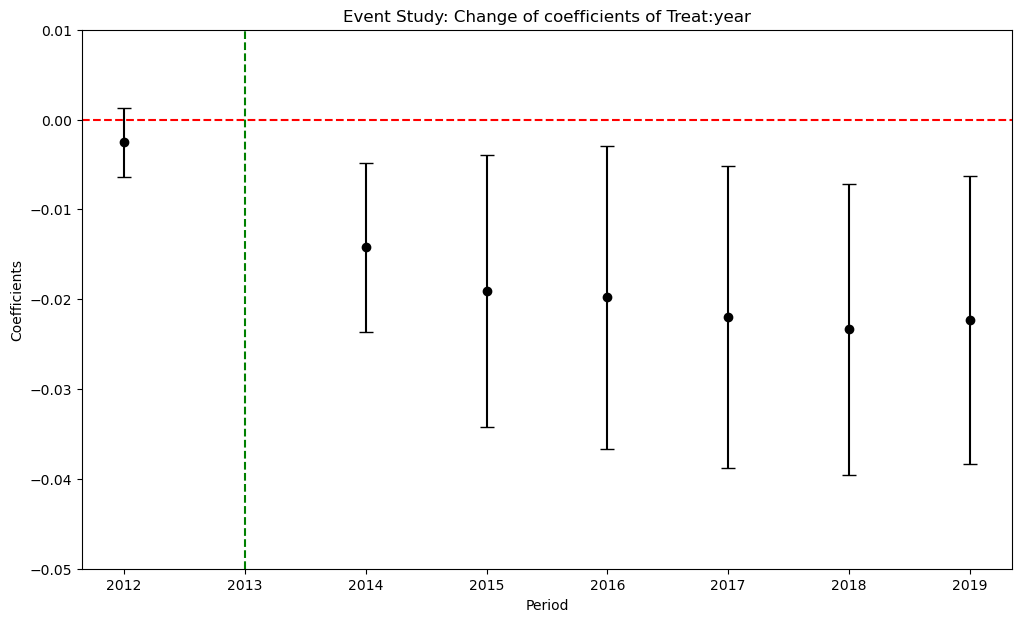

In [398]:
# create a column of years from 2012 to 2019



# draw the change of coeffients of treat:C(AMONTH) over time with standard error
plt.figure(figsize=(12,7))
plt.errorbar(x=year[year['year']!=2013], y=model.params[52:], yerr=1.96*model.bse[52:], color='black', label='Outpatient Visits', fmt = 'o', alpha=1, capsize=5)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('Event Study: Change of coefficients of Treat:year')
plt.xlabel('Period')
plt.ylabel('Coefficients')
# draw a vertical line at 10.5
plt.axvline(x=2013, color='green', linestyle='--', label='expansion')
plt.ylim(-0.05, 0.01)
q9 = plt.gcf()
plt.show()


# Repeat part 9 but again include states that expanded after 2014. Note: this is tricky…you need to put all states onto “event time” to create this graph.

In [387]:
df = pd.read_csv('data/output/test.txt', delimiter='\t', header=None)

# convert the first row to the header
df.columns = df.iloc[0]
df = df[1:]

# make the index start from 0
df.index = range(len(df))

df['share_unins'] = df['uninsured'].astype(float) / df['adult_pop'].astype(float)
df['direct_share'] = df['ins_direct'].astype(float) / df['adult_pop'].astype(float)
df['medi_share'] = df['ins_medicaid'].astype(float) / df['adult_pop'].astype(float)
df['unins_share'] = df['uninsured'].astype(float) / df['adult_pop'].astype(float)
df['expand_year'] = df['expand_year'].astype(float) 

In [388]:
df['year'] = df['year'].astype(float)
df = df.dropna(subset=['expand_ever'])

In [389]:
# ime_to_treat = ifelse(expand_ever==FALSE, 0, year-expand_year),
# time_to_treat = ifelse(time_to_treat < -3, -3, time_to_treat))

df['time_to_treat'] = np.where(df['expand_ever']=='FALSE', -1, df['year']-df['expand_year'])

df['time_to_treat'] = np.where(df['time_to_treat']<-3, -3, df['time_to_treat'])

In [390]:
df['TREAT'] = np.where(df['expand_ever']=='TRUE', 1, 0)

In [391]:
model = smf.ols('share_unins ~ expand_ever*C(time_to_treat, Treatment(-1)) + C(State) + C(year, Treatment(2012))', data = df).fit(cov_type = 'cluster', cov_kwds = {'groups': df['State']})

In [392]:
model.params[17:]

C(State)[T.District of Columbia]                              -0.061508
C(State)[T.Florida]                                            0.055777
C(State)[T.Georgia]                                            0.044125
C(State)[T.Hawaii]                                            -0.051263
C(State)[T.Idaho]                                              0.015891
C(State)[T.Illinois]                                           0.006553
C(State)[T.Indiana]                                            0.017416
C(State)[T.Iowa]                                              -0.036863
C(State)[T.Kansas]                                            -0.023642
C(State)[T.Kentucky]                                          -0.004262
C(State)[T.Louisiana]                                          0.050064
C(State)[T.Maine]                                             -0.009234
C(State)[T.Maryland]                                          -0.017290
C(State)[T.Massachusetts]                                     -0

In [393]:
time_to_treat = pd.DataFrame(df['time_to_treat'].sort_values().unique(), columns=['time_to_treat'])

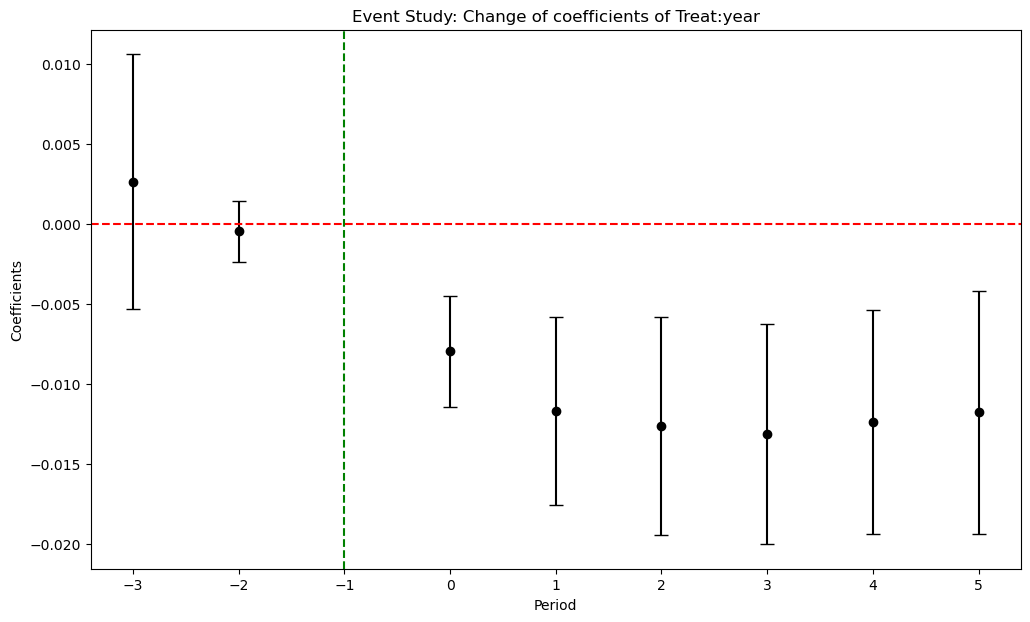

In [394]:
# draw the change of coeffients of treat:C(AMONTH) over time with standard error
plt.figure(figsize=(12,7))
plt.errorbar(x=time_to_treat[time_to_treat['time_to_treat']!=-1], y=model.params[67:], yerr=1.96*model.bse[67:], color='black', label='Outpatient Visits', fmt = 'o', alpha=1, capsize=5)

plt.axhline(y=0, color='red', linestyle='--')
plt.title('Event Study: Change of coefficients of Treat:year')
plt.xlabel('Period')
plt.ylabel('Coefficients')
# draw a vertical line at 10.5
plt.axvline(x=-1, color='green', linestyle='--', label='expansion')
q10 = plt.gcf()
plt.show()

In [448]:
import pickle

with open('hwk5_Q1-10.pkl', 'wb') as f:
    pickle.dump((q1, q3, q4, q5, q6, q7, q8, q9, q10), f)
